# CICIDS 2017 – Exploratory Data Analysis (Analyst Perspective)

This notebook explores traffic behavior in the cleaned CICIDS 2017 dataset.
The focus is on understanding normal traffic patterns and how attack traffic
deviates from them.

No modeling or feature engineering is performed at this stage.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


In [2]:
data1 = pd.read_csv(r"D:\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv")
data2 = pd.read_csv(r"D:\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv")
data3 = pd.read_csv(r"D:\MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv")
data4 = pd.read_csv(r"D:\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data5 = pd.read_csv(r"D:\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
data6 = pd.read_csv(r"D:\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv")
data7 = pd.read_csv(r"D:\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
data8 = pd.read_csv(r"D:\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

data = pd.concat(
    [data1, data2, data3, data4, data5, data6, data7, data8],
    ignore_index=True
)


In [3]:
# Remove leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

In [4]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
missing_counts = data.isna().sum()
missing_counts[missing_counts > 0]

Flow Bytes/s      2867
Flow Packets/s    2867
dtype: int64

In [6]:
data_before = data.shape[0]
data.dropna(inplace=True)
data_after = data.shape[0]

print(f"Rows before: {data_before}")
print(f"Rows after: {data_after}")

Rows before: 2830743
Rows after: 2827876


In [7]:
dup_before = data.shape[0]
data.drop_duplicates(inplace=True)
dup_after = data.shape[0]

print(f"Rows before duplicate removal: {dup_before}")
print(f"Rows after duplicate removal: {dup_after}")

Rows before duplicate removal: 2827876
Rows after duplicate removal: 2520798


In [8]:
print("Final cleaned dataset shape:", data.shape)

Final cleaned dataset shape: (2520798, 79)


In [9]:
label_col = 'Label'
data[label_col].value_counts()


Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

## Class Distribution Context

The dataset remains highly imbalanced after cleaning.
This is expected and reflects real-world SOC conditions,
where benign traffic dominates.


In [10]:
normal_data = data[data[label_col] == 'BENIGN']
attack_data = data[data[label_col] != 'BENIGN']

print("Normal traffic rows:", normal_data.shape[0])
print("Attack traffic rows:", attack_data.shape[0])


Normal traffic rows: 2095057
Attack traffic rows: 425741


## What Does Normal Traffic Look Like?

Normal traffic forms the behavioral baseline.
Understanding its stability and variability is essential
for identifying deviations that may indicate attacks.


In [12]:
# Numeric features chosen for baseline behavior analysis
features = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Flow Bytes/s'
]


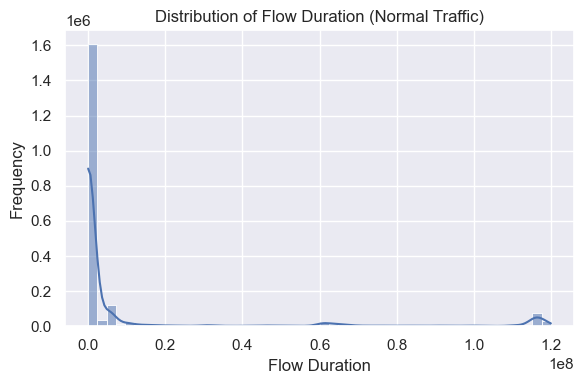

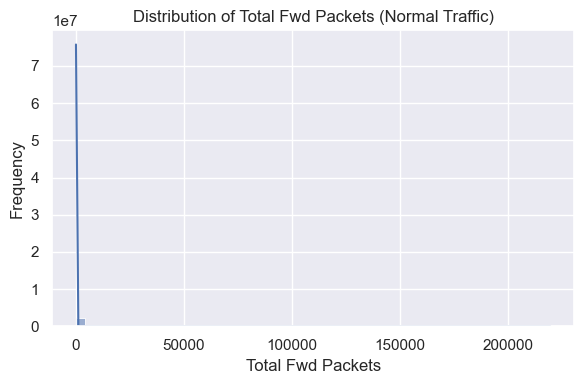

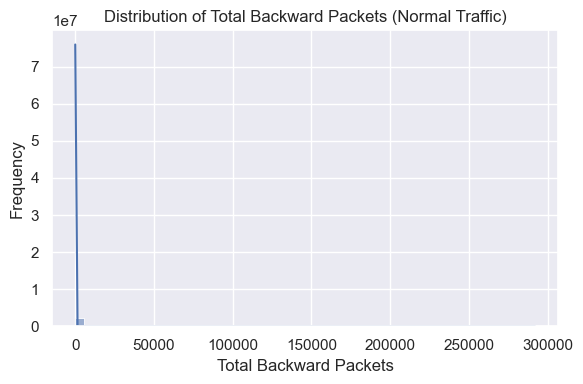

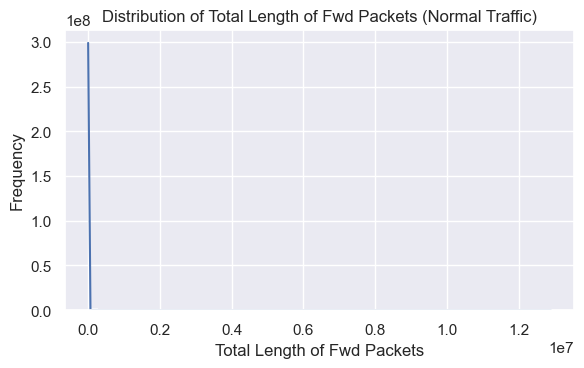

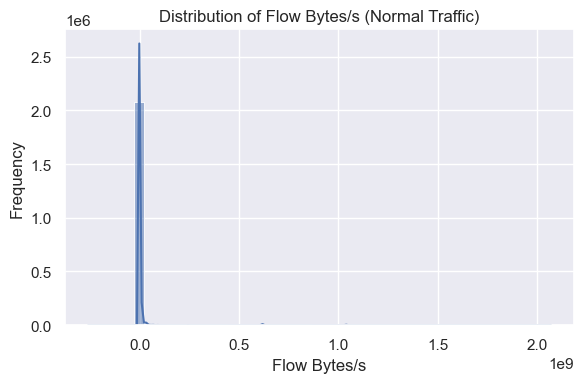

In [13]:
for feature in features:
    plt.figure(figsize=(6, 4))
    
    sns.histplot(
        normal_data[feature],
        bins=50,
        kde=True
    )
    
    plt.title(f"Distribution of {feature} (Normal Traffic)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()


The distributions above represent baseline behavior under normal network conditions.
Most features exhibit stable central tendencies with long tails, indicating occasional
bursty behavior even in benign traffic.

These distributions serve as a reference point for comparison with attack traffic.


## Attack vs Normal Traffic Behavior

Attack traffic is expected to deviate from the normal baseline
through increased variability, spikes, or unstable distributions.


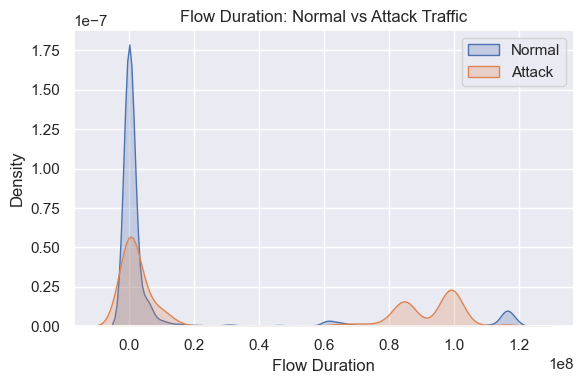

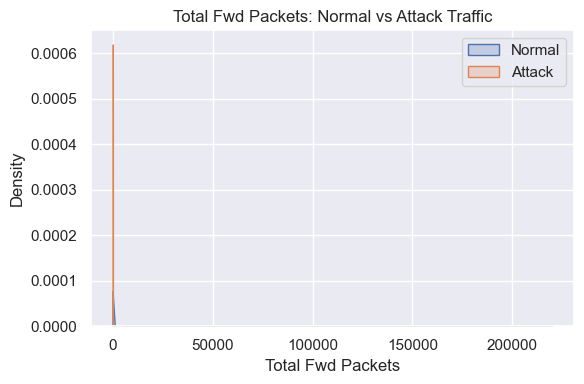

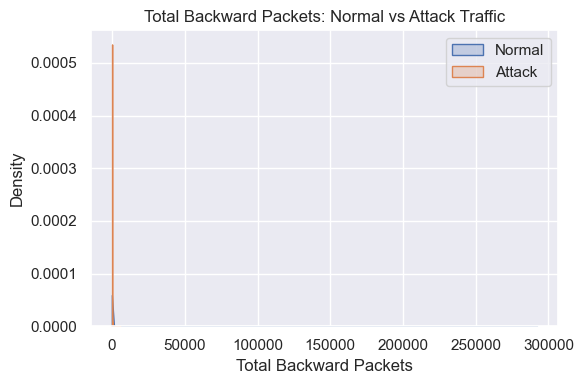

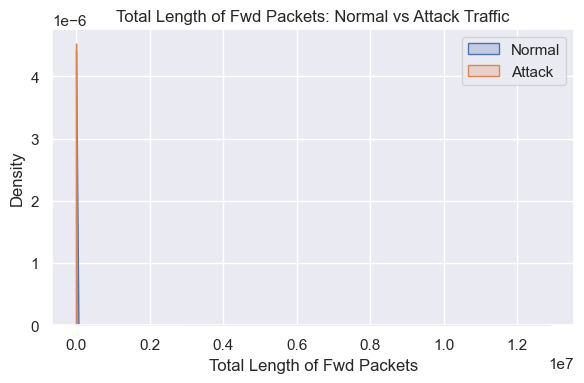

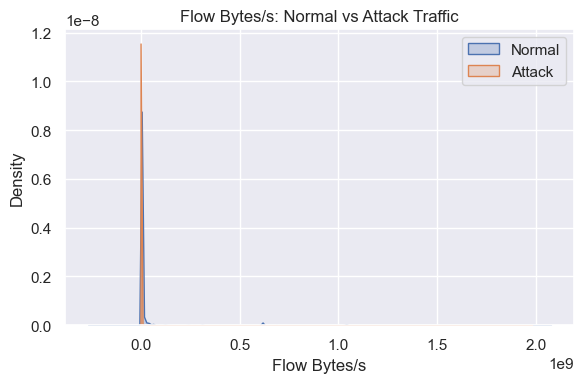

In [14]:
for feature in features:
    plt.figure(figsize=(6, 4))
    
    sns.kdeplot(
        normal_data[feature],
        label="Normal",
        fill=True,
        common_norm=False
    )
    
    sns.kdeplot(
        attack_data[feature],
        label="Attack",
        fill=True,
        common_norm=False
    )
    
    plt.title(f"{feature}: Normal vs Attack Traffic")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Compared to normal traffic, attack traffic shows:
- Higher variance
- Distribution shifts
- Less stability

Differences are often visible in distribution shape
rather than simple averages.


## Misleading Signals

Some features appear to separate classes visually but
exhibit significant overlap.

Relying solely on such features can lead to false confidence
and poor detection reliability.


## Phase 1 Summary – Analyst Perspective

Phase 1 analysis focused on:
- Understanding traffic behavior
- Establishing a normal baseline
- Observing how attack traffic deviates

No assumptions about detectability or model performance
are made at this stage.
